<center><h1>Shrey_Shah_HW7</h1></center>

Name: Shrey Shah<br>Github Username: shreyshah97<br>USC ID: 5061063668

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### Import packages

In [3]:
import numpy as np
import pandas as pd
import random

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, f1_score, hamming_loss, silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC

import warnings
warnings.filterwarnings("ignore")

### (a) Download the Anuran Calls (MFCCs) Data Set

In [4]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [5]:
num_row = len(df)
random.seed(num_row)
split = int(num_row * 0.7)
train_idx = random.sample(range(num_row), split)

test_idx = []
for i in range(num_row):
    if i not in train_idx:
        test_idx.append(i)

df_train = df.iloc[train_idx, :].reset_index(drop = True)
df_test = df.iloc[test_idx, :].reset_index(drop = True)

x_train = df_train.iloc[:, :-4]
family_train = df_train['Family']
genus_train = df_train['Genus']
species_train = df_train['Species']

x_test = df_test.iloc[:, :-4]
family_test = df_test['Family']
genus_test = df_test['Genus']
species_test = df_test['Species']

### (b) Train a classifier for each label

#### (i) Research

1. **What is Exact match?** 
    * Exact match refers to the evaluation metric used to measure the performance of a multilabel classifier, where the classifier's output is considered correct only if it predicts all the correct labels for an instance.

    * More formally, the exact match is defined as the proportion of instances for which the classifier correctly predicts all the true labels. In other words, an instance is considered correctly classified only if all the predicted labels match the true labels.

2. **What is Hamming Loss?** 
    * Hamming Loss is another evaluation metric used in multilabel classification. It measures the fraction of labels that are incorrectly predicted, over all the labels in the test set.

    * More formally, Hamming Loss is defined as the average fraction of incorrect labels for each instance, where an incorrect label is any label that is either falsely predicted or missed by the classifier.

#### (ii) Train a SVM for each of the labels

In [6]:
def metrics(y_test, y_pred):

    error = 0
    for truth, pred in zip(y_test.values, y_pred.values):
        error += np.sum((truth != pred))
    hamming = error / (y_test.shape[0] * y_test.shape[1])
    
    exact_ratio = 0
    for truth, pred in zip(y_test.values, y_pred.values):
        if sum((truth == pred)) == y_test.shape[1]:
            exact_ratio += 1
    exact_ratio /= y_test.shape[0]
    
    hamming = np.round(hamming, 4)
    exact_ratio = np.round(exact_ratio, 4)
    
    print("Hamming Loss :", hamming)
    print("Exact Match Ratio :", exact_ratio)
    return [hamming, exact_ratio]

In [7]:
def eval_classifiers(x_test, y_test, classifiers):
    y_pred = pd.DataFrame(columns = y_test.columns)
    for label in y_test.columns:
        model = classifiers[label]
        test_pred = model.predict(x_test)
        y_pred.loc[:, label] = test_pred
    return metrics(y_test, y_pred)

In [12]:
def find_best_model(classifier, kwargs, x_train, y_train, x_test, y_test):
    
    model = GridSearchCV(estimator = classifier, **kwargs, n_jobs = -1)
    model.fit(x_train, y_train)
    
    ans = {}
    for param in model.cv_results_['params']:
        for key, value in param.items():
            if key not in ans:
                ans[key] = []
            ans[key].append(value)            
    means = np.round(np.array(model.cv_results_['mean_test_score']), 5)
    ans['mean_test_score'] = means
    result_data = pd.DataFrame(ans)
    display(result_data)

    print("\nThe best parameters are:")
    print(model.best_params_, "\n")
    print(classification_report(y_test, model.predict(x_test)))
    return model

In [13]:
gaussian_SVC_wo_std = {}
summary = {}
kwargs = {
    'scoring' : 'f1_weighted',
    'param_grid' : {
        'C' : np.logspace(1, 4, 4), 
        'gamma' : np.logspace(-3, 6, 10)
    }, 
    'cv' : StratifiedKFold(10, random_state = 69, shuffle = True) 
}
method = "Gaussian SVC without Standardization"

In [14]:
print("Method: ", method)
print("Label: Family")
gaussian_SVC_wo_std['Family'] = find_best_model(SVC(kernel = 'rbf'), kwargs,
                                                x_train, family_train, x_test, family_test)

Method:  Gaussian SVC without Standardization
Label: Family


,C,gamma,mean_test_score
0,10.0,0.001,0.86985
1,10.0,0.010,0.92656
2,10.0,0.100,0.97129
3,10.0,1.000,0.99100
4,10.0,10.000,0.98609
5,10.0,100.000,0.79162
6,10.0,1000.000,0.49333
7,10.0,10000.000,0.47168
8,10.0,100000.000,0.46983
9,10.0,1000000.000,0.46983



The best parameters are:
{'C': 1000.0, 'gamma': 1.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.93      0.93      0.93        15
  Dendrobatidae       0.99      1.00      1.00       154
        Hylidae       1.00      0.98      0.99       673
Leptodactylidae       0.99      1.00      0.99      1317

       accuracy                           0.99      2159
      macro avg       0.98      0.98      0.98      2159
   weighted avg       0.99      0.99      0.99      2159



In [15]:
print("Label: Genus")
gaussian_SVC_wo_std['Genus'] = find_best_model(SVC(kernel = 'rbf'), kwargs,
                                                x_train, genus_train, x_test, genus_test)

Label: Genus


,C,gamma,mean_test_score
0,10.0,0.001,0.74498
1,10.0,0.010,0.91808
2,10.0,0.100,0.97195
3,10.0,1.000,0.98781
4,10.0,10.000,0.98021
5,10.0,100.000,0.73350
6,10.0,1000.000,0.44239
7,10.0,10000.000,0.42458
8,10.0,100000.000,0.42324
9,10.0,1000000.000,0.42324



The best parameters are:
{'C': 100.0, 'gamma': 1.0} 

               precision    recall  f1-score   support

    Adenomera       0.99      1.00      1.00      1240
     Ameerega       0.99      0.99      0.99       154
Dendropsophus       0.97      0.95      0.96        91
    Hypsiboas       0.99      0.99      0.99       479
Leptodactylus       0.95      1.00      0.97        77
Osteocephalus       1.00      0.87      0.93        47
     Rhinella       1.00      0.93      0.97        15
       Scinax       1.00      0.98      0.99        56

     accuracy                           0.99      2159
    macro avg       0.99      0.96      0.97      2159
 weighted avg       0.99      0.99      0.99      2159



In [16]:
print("Label: Species")
gaussian_SVC_wo_std['Species'] = find_best_model(SVC(kernel = 'rbf'), kwargs, 
                                                 x_train, species_train, x_test, species_test)

Label: Species


,C,gamma,mean_test_score
0,10.0,0.001,0.80059
1,10.0,0.010,0.93311
2,10.0,0.100,0.97394
3,10.0,1.000,0.98913
4,10.0,10.000,0.97853
5,10.0,100.000,0.65715
6,10.0,1000.000,0.33010
7,10.0,10000.000,0.31382
8,10.0,100000.000,0.31194
9,10.0,1000000.000,0.31194



The best parameters are:
{'C': 10.0, 'gamma': 1.0} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.98      0.99       182
AdenomeraHylaedactylus       0.99      1.00      1.00      1058
    Ameeregatrivittata       0.99      0.99      0.99       154
            HylaMinuta       0.97      0.93      0.95        91
  HypsiboasCinerascens       0.98      0.99      0.99       153
     HypsiboasCordobae       0.99      0.99      0.99       326
   LeptodactylusFuscus       0.99      1.00      0.99        77
 OsteocephalusOophagus       1.00      0.89      0.94        47
     Rhinellagranulosa       1.00      0.93      0.97        15
           ScinaxRuber       1.00      0.98      0.99        56

              accuracy                           0.99      2159
             macro avg       0.99      0.97      0.98      2159
          weighted avg       0.99      0.99      0.99      2159



In [17]:
print("Evaluation Summary: ", method)
summary[method] = eval_classifiers(x_test, df_test.iloc[:, -4:-1], gaussian_SVC_wo_std)

Evaluation Summary:  Gaussian SVC without Standardization
Hamming Loss : 0.0093
Exact Match Ratio : 0.9847


In [18]:
std_scaler = StandardScaler()
x_train_std = std_scaler.fit_transform(x_train)
x_test_std = std_scaler.fit_transform(x_test)
gaussian_SVC_with_std = {}
method = "Gaussian SVC with Standardization"

In [19]:
print("Method: ", method)
print("Label: Family")
gaussian_SVC_with_std['Family'] = find_best_model(SVC(kernel = 'rbf'), kwargs,
                                                x_train_std, family_train, x_test_std, family_test)

Method:  Gaussian SVC with Standardization
Label: Family


,C,gamma,mean_test_score
0,10.0,0.001,0.94461
1,10.0,0.010,0.98726
2,10.0,0.100,0.98944
3,10.0,1.000,0.90614
4,10.0,10.000,0.57518
5,10.0,100.000,0.47315
6,10.0,1000.000,0.46983
7,10.0,10000.000,0.46983
8,10.0,100000.000,0.46983
9,10.0,1000000.000,0.46983



The best parameters are:
{'C': 100.0, 'gamma': 0.01} 

                 precision    recall  f1-score   support

      Bufonidae       0.78      0.93      0.85        15
  Dendrobatidae       0.99      0.99      0.99       154
        Hylidae       0.99      0.98      0.98       673
Leptodactylidae       0.99      0.99      0.99      1317

       accuracy                           0.99      2159
      macro avg       0.94      0.97      0.95      2159
   weighted avg       0.99      0.99      0.99      2159



In [20]:
print("Label: Genus")
gaussian_SVC_with_std['Genus'] = find_best_model(SVC(kernel = 'rbf'), kwargs,
                                                x_train_std, genus_train, x_test_std, genus_test)

Label: Genus


,C,gamma,mean_test_score
0,10.0,0.001,0.95753
1,10.0,0.010,0.98518
2,10.0,0.100,0.98739
3,10.0,1.000,0.85510
4,10.0,10.000,0.51234
5,10.0,100.000,0.42645
6,10.0,1000.000,0.42324
7,10.0,10000.000,0.42324
8,10.0,100000.000,0.42324
9,10.0,1000000.000,0.42324



The best parameters are:
{'C': 10.0, 'gamma': 0.1} 

               precision    recall  f1-score   support

    Adenomera       0.99      1.00      1.00      1240
     Ameerega       1.00      1.00      1.00       154
Dendropsophus       1.00      0.95      0.97        91
    Hypsiboas       0.96      1.00      0.98       479
Leptodactylus       1.00      0.97      0.99        77
Osteocephalus       1.00      0.79      0.88        47
     Rhinella       1.00      0.87      0.93        15
       Scinax       1.00      0.95      0.97        56

     accuracy                           0.99      2159
    macro avg       0.99      0.94      0.96      2159
 weighted avg       0.99      0.99      0.99      2159



In [21]:
print("Label: Species")
gaussian_SVC_with_std['Species'] = find_best_model(SVC(kernel = 'rbf'), kwargs, 
                                                x_train_std, species_train, x_test_std, species_test)

Label: Species


,C,gamma,mean_test_score
0,10.0,0.001,0.96716
1,10.0,0.010,0.98659
2,10.0,0.100,0.98474
3,10.0,1.000,0.83209
4,10.0,10.000,0.38807
5,10.0,100.000,0.31523
6,10.0,1000.000,0.31194
7,10.0,10000.000,0.31194
8,10.0,100000.000,0.31194
9,10.0,1000000.000,0.31194



The best parameters are:
{'C': 1000.0, 'gamma': 0.01} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.98      0.98      0.98       182
AdenomeraHylaedactylus       0.99      1.00      1.00      1058
    Ameeregatrivittata       0.99      0.99      0.99       154
            HylaMinuta       0.94      0.93      0.94        91
  HypsiboasCinerascens       0.97      0.99      0.98       153
     HypsiboasCordobae       0.99      0.98      0.99       326
   LeptodactylusFuscus       0.97      0.99      0.98        77
 OsteocephalusOophagus       0.95      0.87      0.91        47
     Rhinellagranulosa       0.83      1.00      0.91        15
           ScinaxRuber       1.00      0.98      0.99        56

              accuracy                           0.99      2159
             macro avg       0.96      0.97      0.97      2159
          weighted avg       0.99      0.99      0.99      2159



In [22]:
print("Evaluation Summary: ", method)
summary[method] = eval_classifiers(x_test_std, df_test.iloc[:, -4:-1], gaussian_SVC_with_std)

Evaluation Summary:  Gaussian SVC with Standardization
Hamming Loss : 0.0127
Exact Match Ratio : 0.9764


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [23]:
SVM_L1_classifiers = {}
kwargs = {
    'scoring' : 'f1_weighted', 
    'param_grid' : {'C' : np.logspace(1, 5, 10)}, 
    'cv' : StratifiedKFold(10, random_state = 69, shuffle = True)
}
method = "Support Vector Classifier with L1-penalty"

In [24]:
print("Method: ", method)
print("Label: Family")
SVM_L1_classifiers['Family'] = find_best_model(LinearSVC(penalty = 'l1', dual = False, max_iter = 10000), kwargs,
                                           x_train_std, family_train, x_test_std, family_test)

Method:  Support Vector Classifier with L1-penalty
Label: Family


,C,mean_test_score
0,10.000000,0.92847
1,27.825594,0.92866
2,77.426368,0.92866
3,215.443469,0.92866
4,599.484250,0.92866
5,1668.100537,0.92866
6,4641.588834,0.92866
7,12915.496650,0.92866
8,35938.136638,0.92866
9,100000.000000,0.92866



The best parameters are:
{'C': 27.825594022071243} 

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        15
  Dendrobatidae       0.88      0.92      0.90       154
        Hylidae       0.94      0.90      0.92       673
Leptodactylidae       0.95      0.98      0.96      1317

       accuracy                           0.94      2159
      macro avg       0.69      0.70      0.70      2159
   weighted avg       0.94      0.94      0.94      2159



In [25]:
print("Label: Genus")
SVM_L1_classifiers['Genus'] = find_best_model(LinearSVC(penalty = 'l1', dual = False, max_iter = 10000), kwargs, 
                                              x_train_std, genus_train, x_test_std, genus_test)

Label: Genus


,C,mean_test_score
0,10.000000,0.94693
1,27.825594,0.94716
2,77.426368,0.94716
3,215.443469,0.94716
4,599.484250,0.94716
5,1668.100537,0.94716
6,4641.588834,0.94697
7,12915.496650,0.94697
8,35938.136638,0.94697
9,100000.000000,0.94697



The best parameters are:
{'C': 27.825594022071243} 

               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1240
     Ameerega       0.92      0.95      0.93       154
Dendropsophus       0.92      0.67      0.78        91
    Hypsiboas       0.92      0.98      0.95       479
Leptodactylus       0.97      0.90      0.93        77
Osteocephalus       1.00      0.36      0.53        47
     Rhinella       0.91      0.67      0.77        15
       Scinax       0.95      0.93      0.94        56

     accuracy                           0.95      2159
    macro avg       0.94      0.80      0.85      2159
 weighted avg       0.95      0.95      0.94      2159



In [26]:
print("Label: Species")
SVM_L1_classifiers['Species'] = find_best_model(LinearSVC(penalty = 'l1', dual = False, max_iter = 10000), kwargs, 
                                                x_train_std, species_train, x_test_std, species_test)

Label: Species


,C,mean_test_score
0,10.000000,0.95877
1,27.825594,0.95857
2,77.426368,0.95837
3,215.443469,0.95837
4,599.484250,0.95837
5,1668.100537,0.95837
6,4641.588834,0.95837
7,12915.496650,0.95837
8,35938.136638,0.95837
9,100000.000000,0.95837



The best parameters are:
{'C': 10.0} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.88      0.94      0.91       182
AdenomeraHylaedactylus       0.99      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.94      0.94       154
            HylaMinuta       0.91      0.70      0.80        91
  HypsiboasCinerascens       0.92      0.94      0.93       153
     HypsiboasCordobae       0.92      0.96      0.94       326
   LeptodactylusFuscus       0.97      0.91      0.94        77
 OsteocephalusOophagus       1.00      0.49      0.66        47
     Rhinellagranulosa       0.72      0.87      0.79        15
           ScinaxRuber       0.93      0.96      0.95        56

              accuracy                           0.95      2159
             macro avg       0.92      0.87      0.88      2159
          weighted avg       0.95      0.95      0.95      2159



In [27]:
print("Evaluation Summary: ", method)
summary[method] = eval_classifiers(x_test_std, df_test.iloc[:, -4:-1], SVM_L1_classifiers)

Evaluation Summary:  Support Vector Classifier with L1-penalty
Hamming Loss : 0.0523
Exact Match Ratio : 0.9143


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [28]:
def smote_param_search(classifier, settings, x_train, y_train, x_test, y_test):
    naive_model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', classifier)
    ])
    selected_model = find_best_model(naive_model, settings, x_train, y_train, x_test, y_test)
    return selected_model

In [29]:
SVC_smote_classifiers = {}
kwargs = {
    'scoring' : 'f1_weighted', 
    'param_grid' : {'classification__C' : np.logspace(1, 5, 10)}, 
    'cv' : StratifiedKFold(10, random_state = 69, shuffle = True),
}
method = "SVM with L1 penalty and SMOTE"

In [30]:
print("Method: ", method)
print("Label: Family")
SVC_smote_classifiers['Family'] = smote_param_search(LinearSVC(penalty = 'l1', dual = False, max_iter = 20000), 
                                                     kwargs, x_train_std, family_train, x_test_std, family_test)

Method:  SVM with L1 penalty and SMOTE
Label: Family


,classification__C,mean_test_score
0,10.000000,0.92129
1,27.825594,0.92041
2,77.426368,0.92022
3,215.443469,0.92110
4,599.484250,0.92044
5,1668.100537,0.92098
6,4641.588834,0.92088
7,12915.496650,0.92108
8,35938.136638,0.92012
9,100000.000000,0.92130



The best parameters are:
{'classification__C': 100000.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.24      1.00      0.38        15
  Dendrobatidae       0.76      0.98      0.86       154
        Hylidae       0.95      0.86      0.90       673
Leptodactylidae       0.97      0.94      0.95      1317

       accuracy                           0.92      2159
      macro avg       0.73      0.95      0.77      2159
   weighted avg       0.94      0.92      0.93      2159



In [31]:
print("Label : Genus")
SVC_smote_classifiers['Genus'] = smote_param_search(LinearSVC(penalty = 'l1', dual = False, max_iter = 10000), 
                                                    kwargs, x_train_std, genus_train, x_test_std, genus_test)

Label : Genus


,classification__C,mean_test_score
0,10.000000,0.91883
1,27.825594,0.91960
2,77.426368,0.91754
3,215.443469,0.91710
4,599.484250,0.91913
5,1668.100537,0.91878
6,4641.588834,0.91778
7,12915.496650,0.91789
8,35938.136638,0.91864
9,100000.000000,0.91859



The best parameters are:
{'classification__C': 27.825594022071243} 

               precision    recall  f1-score   support

    Adenomera       0.99      0.92      0.95      1240
     Ameerega       0.82      0.92      0.87       154
Dendropsophus       0.65      0.97      0.78        91
    Hypsiboas       0.97      0.90      0.94       479
Leptodactylus       0.93      0.91      0.92        77
Osteocephalus       0.56      0.74      0.64        47
     Rhinella       0.24      0.87      0.37        15
       Scinax       0.86      0.96      0.91        56

     accuracy                           0.91      2159
    macro avg       0.75      0.90      0.80      2159
 weighted avg       0.94      0.91      0.92      2159



In [32]:
print("Label : Species")
SVC_smote_classifiers['Species'] = smote_param_search(LinearSVC(penalty = 'l1', dual = False, max_iter = 25000), 
                                                      kwargs, x_train_std, species_train, x_test_std, species_test)

Label : Species


,classification__C,mean_test_score
0,10.000000,0.95838
1,27.825594,0.95827
2,77.426368,0.95853
3,215.443469,0.95948
4,599.484250,0.95886
5,1668.100537,0.95969
6,4641.588834,0.95847
7,12915.496650,0.95975
8,35938.136638,0.95962
9,100000.000000,0.95931



The best parameters are:
{'classification__C': 12915.496650148827} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.95      0.92      0.94       182
AdenomeraHylaedactylus       1.00      0.99      0.99      1058
    Ameeregatrivittata       0.95      0.90      0.92       154
            HylaMinuta       0.83      0.93      0.88        91
  HypsiboasCinerascens       0.93      0.93      0.93       153
     HypsiboasCordobae       0.95      0.92      0.93       326
   LeptodactylusFuscus       0.92      0.90      0.91        77
 OsteocephalusOophagus       0.82      0.70      0.76        47
     Rhinellagranulosa       0.40      0.93      0.56        15
           ScinaxRuber       0.90      0.96      0.93        56

              accuracy                           0.95      2159
             macro avg       0.86      0.91      0.88      2159
          weighted avg       0.96      0.95      0.95      2159



In [33]:
print("Evaluation Summary: ", method)
summary[method] = eval_classifiers(x_test_std, df_test.iloc[:, -4:-1], SVC_smote_classifiers)

Evaluation Summary:  SVM with L1 penalty and SMOTE
Hamming Loss : 0.0715
Exact Match Ratio : 0.8569


In [34]:
final_result = pd.DataFrame(data = summary)
final_result.index = ['Humming Loss', 'Exact Match Ratio']
final_result

,Gaussian SVC without Standardization,Gaussian SVC with Standardization,Support Vector Classifier with L1-penalty,SVM with L1 penalty and SMOTE
Humming Loss,0.0093,0.0127,0.0523,0.0715
Exact Match Ratio,0.9847,0.9764,0.9143,0.8569


##### Findings
* Average Exact Match Loss is highest for Gaussian Kernel SVM.
* In L1-Penalized SVM, the Average Exact Match Loss and Average Hamming Loss have increased as compared to Gaussian Kernel SVM.
* There is a reduction in Average Exact Match Loss for L1-Penalized SVM after balancing the classes using SMOTE.


##### Conclusion
* Average Exact Match Loss and Average Hamming Loss for all models suggest that Gaussian Kernel SVM is performing the best.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) & (b) Use k-means clustering & Determine which family is the majority

In [45]:
def get_best_k(num_cluster, x_train, random_state):
    best_k, max_score = 2, 0
    for n in range(2, num_cluster + 1):
        model = KMeans(n_clusters = n, random_state = random_state)
        cluster_labels = model.fit_predict(x_train)
        silhouette_avg = silhouette_score(x_train, cluster_labels)
        if silhouette_avg > max_score:
            best_k = n
            max_score = silhouette_avg
    print("Best K: ", best_k)
    return best_k

In [46]:
def get_majority_labels(best_k, cluster_labels, y_train):
    cluster_major = pd.DataFrame(columns = y_train.columns)
    for c in range(best_k):
        idx, = np.where(cluster_labels == c)
        cluster_samples = y_train.iloc[idx, :]
        row = []
        for label in y_train.columns:
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[c] = row
    return cluster_major

In [47]:
def evaluation(cluster_major, cluster_labels, y_train):
    missclf_labels = 0
    for c in range(len(cluster_major)):
        idx, = np.where(cluster_labels == c)
        for label in y_train.loc[idx].values:
            miss = (label != cluster_major.loc[c].values)
            missclf_labels += np.sum(miss)
    hamming_dist = missclf_labels / y_train.shape[0]
    hamming_loss = missclf_labels / (y_train.shape[0] * y_train.shape[1])
    return hamming_dist, hamming_loss

In [48]:
def monte_carlo(times, x_train, y_train):
    hamming_distance, hamming_loss = [], []
    for i in range(times):
        print("Iteration: ", i+1)
        best_k = get_best_k(times, x_train, i)
        model = KMeans(n_clusters = best_k, random_state = i)
        cluster_labels = model.fit_predict(x_train)
        cluster_major = get_majority_labels(best_k, cluster_labels, y_train)
        display(cluster_major)
        cur_dist, cur_loss = evaluation(cluster_major, cluster_labels, y_train)
        hamming_distance.append(cur_dist)
        hamming_loss.append(cur_loss)
        print("Hamming Distance: {}".format(round(cur_dist, 4)))
        print("Hamming Loss: {}\n".format(round(cur_loss, 4)))
    return hamming_distance, hamming_loss

In [49]:
hamming_dist, hamming_loss = monte_carlo(50, df.iloc[:, :-4], df.iloc[:, -4:-1])

Iteration:  1
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6653
Hamming Loss: 0.2218

Iteration:  2
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  3
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.7358
Hamming Loss: 0.2453

Iteration:  4
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  5
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  6
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  7
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  8
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  9
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  10
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  11
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  12
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  13
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  14
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6674
Hamming Loss: 0.2225

Iteration:  15
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  16
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6674
Hamming Loss: 0.2225

Iteration:  17
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  18
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.7012
Hamming Loss: 0.2337

Iteration:  19
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  20
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6653
Hamming Loss: 0.2218

Iteration:  21
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.7022
Hamming Loss: 0.2341

Iteration:  22
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  23
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  24
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6674
Hamming Loss: 0.2225

Iteration:  25
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  26
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  27
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  28
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6674
Hamming Loss: 0.2225

Iteration:  29
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  30
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6664
Hamming Loss: 0.2221

Iteration:  31
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  32
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  33
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  34
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  35
Best K:  4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.5582
Hamming Loss: 0.1861

Iteration:  36
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  37
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  38
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  39
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  40
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  41
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  42
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  43
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  44
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  45
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  46
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6653
Hamming Loss: 0.2218

Iteration:  47
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  48
Best K:  4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224

Iteration:  49
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.8402
Hamming Loss: 0.2801

Iteration:  50
Best K:  4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224



### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [50]:
print("Average Hamming Distance :", round(np.mean(hamming_dist), 5))
print("Average Hamming Loss :", round(np.mean(hamming_loss), 5))
print("Average Hamming Score ", round(1 - np.mean(hamming_loss), 5))

Average Hamming Distance : 0.67117
Average Hamming Loss : 0.22372
Average Hamming Score  0.77628


## 3. ISLR 12.6.2

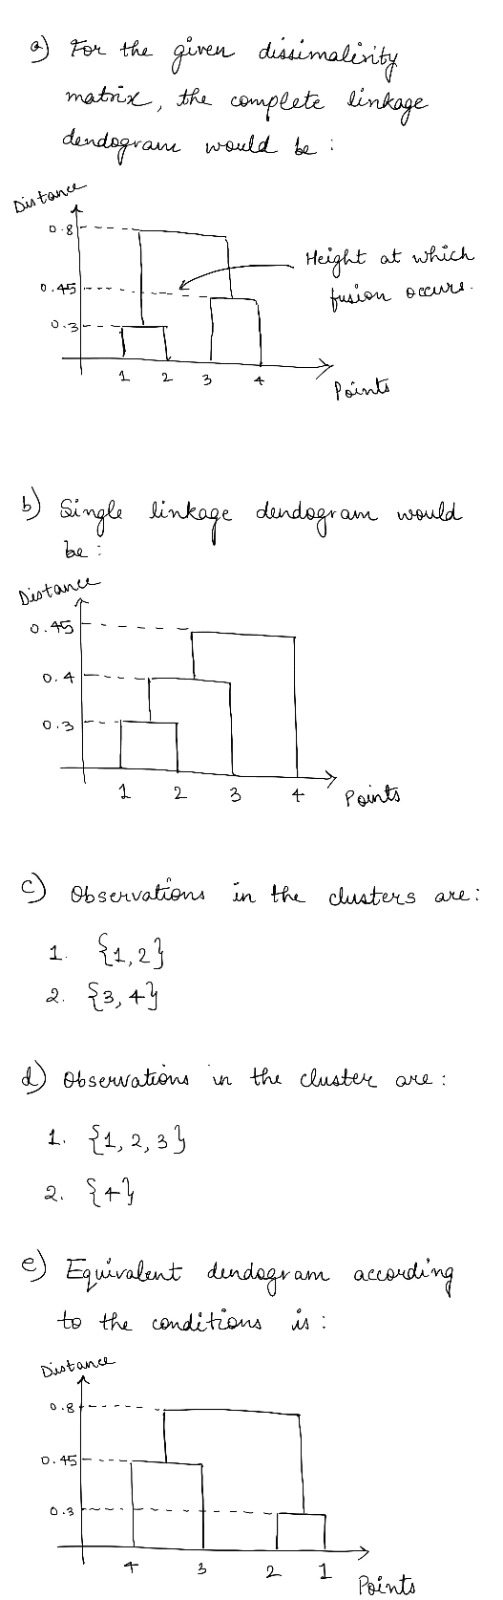